# kNN

In [5]:
import sklearn.datasets as sk_datasets
import sklearn.neighbors as sk_neighbors
import sklearn.preprocessing as sk_preprocessing
import sklearn.metrics as sk_metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load and examine the iris dataset.

In [6]:
iris_df = sk_datasets.load_iris(as_frame=True).frame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
for unique_target in iris_df.target.unique():
    print(f"Target {unique_target} has {iris_df[iris_df.target == unique_target].shape[0]} samples")

Target 0 has 50 samples
Target 1 has 50 samples
Target 2 has 50 samples


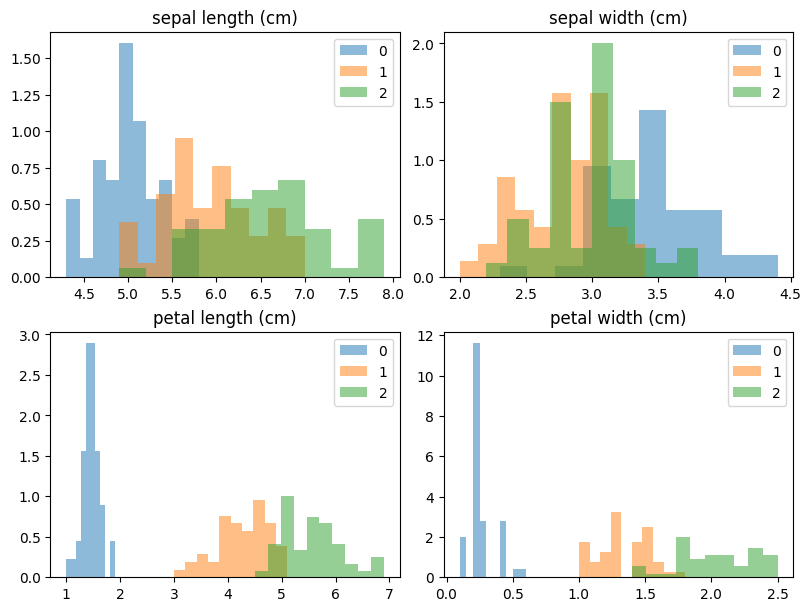

In [8]:
unique_labels = iris_df['target'].unique()
features = iris_df.columns[:-1]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8, 6), layout='constrained')

for i, label in enumerate(features):
    axis = axs[i // 2][i % 2]
    for unique_label in unique_labels:
        axis.hist(iris_df[label][iris_df['target'] == unique_label], alpha=0.5, label=unique_label, density=True)
    axis.set_title(label)
    axis.legend()

plt.show()

Transform and prepare data.

In [9]:
train, test = np.split(iris_df.sample(frac=1), [int(.8*len(iris_df))])

/Users/philipcastiglione/.asdf/installs/python/3.12.2/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
def scale_dataset(dataframe: pd.DataFrame):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe['target'].values

    scaler = sk_preprocessing.StandardScaler()

    X = scaler.fit_transform(X)
    
    data = np.hstack((X, y.reshape(-1, 1)))

    return data, X, y

In [11]:
train, X_train, y_train = scale_dataset(train)
test, X_test, y_test = scale_dataset(test)

In [12]:
for i in [1, 3, 5]:
  knn_model = sk_neighbors.KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(X_train, y_train)

  y_pred = knn_model.predict(X_test)

  print(f"KNN with {i} neighbors")
  print(sk_metrics.classification_report(y_test, y_pred))
  print()

KNN with 1 neighbors
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.58      0.74        12
           2       0.55      1.00      0.71         6

    accuracy                           0.83        30
   macro avg       0.85      0.86      0.81        30
weighted avg       0.91      0.83      0.84        30


KNN with 3 neighbors
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.58      0.74        12
           2       0.55      1.00      0.71         6

    accuracy                           0.83        30
   macro avg       0.85      0.86      0.81        30
weighted avg       0.91      0.83      0.84        30


KNN with 5 neighbors
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.58      0.74        12
          